# A Cantera Simulation Using RMG-Py

In [1]:
from rmgpy.chemkin import *
from rmgpy.tools.canteraModel import *
from rmgpy.species import Species
from IPython.display import display, Image
import matplotlib.pyplot as plt
import cantera as ct
%matplotlib inline

Using Theano backend.


Load the species and reaction from the RMG-generated chemkin file `chem_annotated.inp` and `species_dictionary.txt` file found in your `chemkin` folder after running a job.

In [2]:
speciesList, reactionList = loadChemkinFile('/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t63/chemkin/chem_annotated2.inp',
                                            '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t63/chemkin/species_dictionary.txt',
                                           '/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t63/chemkin/tran.dat')

Set a few conditions for how to react the system

In [3]:
# Find the initial species
user_DMS=Species().fromSMILES('CSC')
speciesDict = getRMGSpeciesFromUserSpecies([user_DMS], speciesList)
DMS = speciesDict[user_DMS]

user_HOOH=Species().fromSMILES('OO')
speciesDict = getRMGSpeciesFromUserSpecies([user_HOOH], speciesList)
HOOH = speciesDict[user_HOOH]

user_OH=Species().fromSMILES('[OH]')
speciesDict = getRMGSpeciesFromUserSpecies([user_OH], speciesList)
OH = speciesDict[user_OH]

user_O2=Species().fromSMILES('[O][O]')
speciesDict = getRMGSpeciesFromUserSpecies([user_O2], speciesList)
O2 = speciesDict[user_O2]

user_N2=Species().fromSMILES('N#N')
speciesDict = getRMGSpeciesFromUserSpecies([user_N2], speciesList)
N2 = speciesDict[user_N2]


reactorTypeList = ['IdealGasReactor']
molFracList=[{DMS: 0.000015, HOOH: 0.000000, OH: 0.00005, O2: 0.205, N2: 0.79494}]
Tlist = ([298],'K')
Plist = ([1],'atm')
reactionTimeList = ([100], 'ms')

In [4]:
# Create cantera object, loading in the species and reactions
job = Cantera(speciesList=speciesList, reactionList=reactionList, outputDirectory='temp')
# The cantera file must be created from an associated chemkin file

# We can either load the Model from the initialized set of rmg species and reactions
job.loadModel()

# Or load it from a chemkin file by uncommenting the following line:
#job.loadChemkinModel('data/minimal_model/chem_annotated.inp',transportFile='data/minimal_model/tran.dat')

# Generate the conditions based on the settings we declared earlier
job.generateConditions(reactorTypeList, reactionTimeList, molFracList, Tlist, Plist)
# Simulate and plot
alldata = job.simulate(1e-24, 1e-12)
job.plot(alldata)

AttributeError: 'NoneType' object has no attribute 'value_si'

In [21]:
# We can view the cantera model Solution's species and reactions
ctSpecies = job.model.species()
ctReactions = job.model.reactions()

# We can view a cantera species or reaction object from this
ct_ethane = ctSpecies[5]
ct_rxn = ctReactions[0]

print ct_ethane
print ct_rxn

<Species O2(4)>
DMSOH(5) + O2(4) <=> DMSO(6) + OOH(7)


In [ ]:
# We can also do things like modifying the cantera species thermo and reaction kinetics through modifying the
# RMG objects first, then using the `modifyReactionKinetics` or `modifySpeciesThermo` functions

# Alter the RMG objects in place, lets pick ethane and the first reaction
rmg_ethane = speciesDict[user_ethane]
rmg_ethane.thermo.changeBaseEnthalpy(2*4184)  # Change base enthalpy by 2 kcal/mol

rmg_rxn = reactionList[0]
rmg_rxn.kinetics.changeRate(4)  # Change A factor by multiplying by a factor of 4

# Take a look at the state of the cantera model before and after
print 'Cantera Model: Before'
ctSpecies = job.model.species()
ctReactions = job.model.reactions()
print 'Ethane Thermo = {} kcal/mol'.format(ctSpecies[4].thermo.h(300)/1000/4184)
print 'Reaction 1 Kinetics = {}'.format(ctReactions[0].rate)

# Now use the altered RMG objects to modify the kinetics and thermo
job.modifyReactionKinetics(0, rmg_rxn)
job.modifySpeciesThermo(4, rmg_ethane, useChemkinIdentifier = True)

# If we modify thermo, the cantera model must be refreshed.  If only kinetics are modified, this does not need to be done.
job.refreshModel()

print ''
print 'Cantera Model: After'
ctSpecies = job.model.species()
ctReactions = job.model.reactions()
print 'Ethane Thermo = {} kcal/mol'.format(ctSpecies[4].thermo.h(300)/1000/4184)
print 'Reaction 1 Kinetics = {}'.format(ctReactions[0].rate)

Condition 1


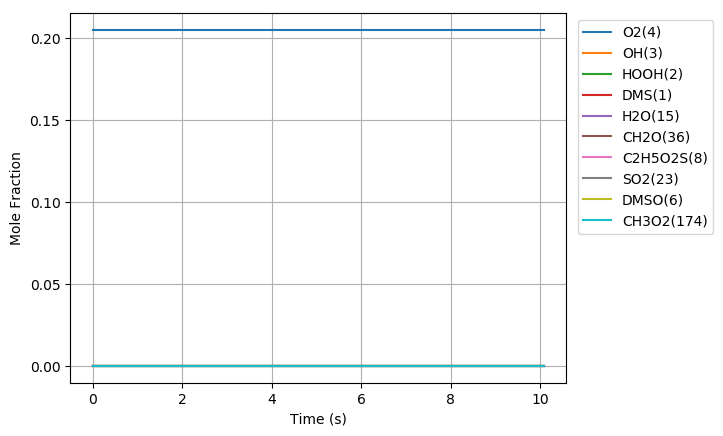

In [19]:
# Show the plots in the ipython notebook
for i, condition in enumerate(job.conditions):
    print 'Condition {0}'.format(i+1)
    display(Image(filename="temp/{0}_mole_fractions.png".format(i+1)))

4199
4199
DMSOH(5)
DMSO(6)
MTF(11)
MTFrad(13)
DMSO2(17)
DMSO2(17)
SO2(23)


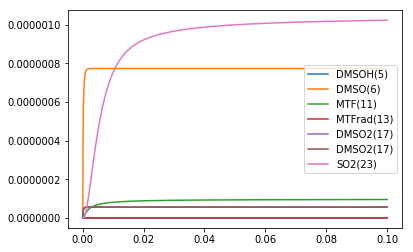

In [29]:
for i, conditionData in enumerate(alldata):
            time, dataList, reactionSensitivityData = conditionData
            # In RMG, any species with an index of -1 is an inert and should not be plotted
            inertList = [species for species in job.speciesList if species.index == -1 ]
            
            TData = dataList[0]
            PData = dataList[1]
            speciesData = [data for data in dataList if data.species not in inertList]

#xvar = time.data
j=24
#print(speciesData[j].label)
#print(speciesData[j].data)
print(len(speciesData[24].data))
print(len(time.data))
for k in range((len(speciesData))):#[7,24]:#
    if 'DMSO' in speciesData[k].label:#or 'SO2' or 'MTF' or 'DMSO2'
        print speciesData[k].label
        plt.plot(time.data, speciesData[k].data, label=speciesData[k].label)
    if 'SO2' in speciesData[k].label:#or 'SO2' or 'MTF' or 'DMSO2'
        print speciesData[k].label
        plt.plot(time.data, speciesData[k].data, label=speciesData[k].label)
    if 'MTF' in speciesData[k].label:#or 'SO2' or 'MTF' or 'DMSO2'
        print speciesData[k].label
        plt.plot(time.data, speciesData[k].data, label=speciesData[k].label)
#    if 'CSO' in speciesData[k].label:#or 'SO2' or 'MTF' or 'DMSO2'
#        print speciesData[k].label
#        plt.plot(time.data, speciesData[k].data, label=speciesData[k].label)
#    if 'DMS' in speciesData[k].label:#or 'SO2' or 'MTF' or 'DMSO2'
#        print speciesData[k].label
#        plt.plot(time.data, speciesData[k].data, label=speciesData[k].label)
plt.legend()

        

In [127]:
print dir(job.simulate)

['__call__', '__class__', '__cmp__', '__delattr__', '__doc__', '__format__', '__func__', '__get__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'im_class', 'im_func', 'im_self']
